<a href="https://colab.research.google.com/github/yGit741/nlp-ex2-yonatan_and_omer/blob/main/yonatan_and_omer_Assignment_02_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing
![](https://i.imgur.com/qkg2E2D.png)

## Assignment 002 - NER Tagger

> Notebook by:
> - NLP Course Stuff
## Revision History

| Version | Date       | User        | Content / Changes                                                   |
|---------|------------|-------------|---------------------------------------------------------------------|
| 0.1.000 | 29/05/2025 | course staff| First version                                                       |


## Overview
In this assignment, you will build a complete training and testing pipeline for a neural sequential tagger for named entities using LSTM.

## Dataset
You will work with the ReCoNLL 2003 dataset, a corrected version of the [CoNLL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/):

**Click on those links so you have access to the data!**
- [Train data](https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing)

- [Dev data](https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing)

- [Test data](https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing)

As you will see, the annotated texts are labeled according to the `IOB` annotation scheme (more on this below), for 3 entity types: Person, Organization, Location.

## Your Implementation

Please create a local copy of this template Colab's Notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KGkObwUn5QQm_v0nB0nAUlB4YrwThuzl#scrollTo=Z-fCqGh9ybgm)

The assignment's instructions are there; follow the notebook.

## Submission
- **Notebook Link**: Add the URL to your assignment's notebook in the `notebook_link.txt` file, following the format provided in the example.
- **Access**: Ensure the link has edit permissions enabled to allow modifications if needed.
- **Deadline**: <font color='green'>12/06/2025</font>.
- **Platform**: Continue using GitHub for submissions. Push your project to the team repository and monitor the test results under the actions section.

Good Luck 🤗


<!-- ## NER schemes:  

> `IO`: is the simplest scheme that can be applied to this task. In this scheme, each token from the dataset is assigned one of two tags: an inside tag (`I`) and an outside tag (`O`). The `I` tag is for named entities, whereas the `O` tag is for normal words. This scheme has a limitation, as it cannot correctly encode consecutive entities of the same type.

> `IOB`: This scheme is also referred to in the literature as BIO and has been adopted by the Conference on Computational Natural Language Learning (CoNLL) [1]. It assigns a tag to each word in the text, determining whether it is the beginning (`B`) of a known named entity, inside (`I`) it, or outside (`O`) of any known named entities.

> `IOE`: This scheme works nearly identically to `IOB`, but it indicates the end of the entity (`E` tag) instead of its beginning.

> `IOBES`: An alternative to the IOB scheme is `IOBES`, which increases the amount of information related to the boundaries of named entities. In addition to tagging words at the beginning (`B`), inside (`I`), end (`E`), and outside (`O`) of a named entity. It also labels single-token entities with the tag `S`.

> `BI`: This scheme tags entities in a similar method to `IOB`. Additionally, it labels the beginning of non-entity words with the tag B-O and the rest as I-O.

> `IE`: This scheme works exactly like `IOE` with the distinction that it labels the end of non-entity words with the tag `E-O` and the rest as `I-O`.

> `BIES`: This scheme encodes the entities similar to `IOBES`. In addition, it also encodes the non-entity words using the same method. It uses `B-O` to tag the beginning of non-entity words, `I-O` to tag the inside of non-entity words, and `S-O` for single non-entity tokens that exist between two entities. -->


## NER Schemes

### IO
- **Description**: The simplest scheme for named entity recognition (NER).
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Limitation**: Cannot correctly encode consecutive entities of the same type.

### IOB (BIO)
- **Description**: Adopted by the Conference on Computational Natural Language Learning (CoNLL).
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Advantage**: Can encode the boundaries of consecutive entities.

### IOE
- **Description**: Similar to IOB, but indicates the end of an entity.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
- **Advantage**: Focuses on the end boundary of entities.

### IOBES
- **Description**: An extension of IOB with additional boundary information.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
- **Advantage**: Provides more detailed boundary information for named entities.

### BI
- **Description**: Tags entities similarly to IOB and labels the beginning of non-entity words.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Distinguishes the beginning of non-entity sequences.

### IE
- **Description**: Similar to IOE but for non-entity words.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `E-O`: End of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Highlights the end of non-entity sequences.

### BIES
- **Description**: Encodes both entities and non-entity words using the IOBES method.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
  - `S-O`: Single non-entity token.
- **Advantage**: Comprehensive encoding for both entities and non-entities.




In [1]:
!mkdir data
# Fetch data
train_link = 'https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing'
dev_link   = 'https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing'
test_link  = 'https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing'

!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf' -O data/train.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rdUida-j3OXcwftITBlgOh8nURhAYUDw' -O data/dev.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=137Ht40OfflcsE6BIYshHbT5b2iIJVaDx' -O data/test.txt


mkdir: cannot create directory ‘data’: File exists


In [2]:
# Any additional needed libraries
# !pip install --q

In [3]:
# Standard Library Imports
import os
import copy
import random
import warnings
from collections import defaultdict
from typing import Optional

# ML
import numpy as np
import scipy as sp
import pandas as pd

# Visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch as th
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support


In [4]:
SEED = 42
# Set the random seed for Python
random.seed(SEED)

# Set the random seed for numpy
np.random.seed(SEED)

# Set the random seed for pytorch
th.manual_seed(SEED)

# If using CUDA (for GPU operations)
th.cuda.manual_seed(SEED)

# Set up the device
# TO DO ----------------------------------------------------------------------
DEVICE = None
# TO DO ----------------------------------------------------------------------
# assert DEVICE == "cuda"

DataType = list[tuple[list[str], list[str]]]

# Part 1 - Dataset Preparation

## Step 1: Read Data
Write a function for reading the data from a single file (of the ones that are provided above).   
- The function recieves a filepath
- The funtion encodes every sentence individually using a pair of lists, one list contains the words and one list contains the tags.
- Each list pair will be added to a general list (data), which will be returned back from the function.

Example output:
```
[
  (['At','Trent','Bridge',':'],['O','B-LOC','I-LOC ','O']),
  ([...],[...]),
  ...
]
```

In [5]:
def read_data(filepath:str) -> DataType:
  """
  Read data from a single file.
  The function recieves a filepath
  The funtion encodes every sentence using a pair of lists, one list contains the words and one list contains the tags.
  :param filepath: path to the file
  :return: data as a list of tuples
  """
  data = []
  # TO DO ----------------------------------------------------------------------
  sentence_words = []
  sentence_tags = []

  with open(filepath, 'r') as f:
    for line in f: # read line by line from the file
      line = line.strip()

      if line:  # check the line isn't empty
        parts = line.split() # split the line to word and a tag
        if len(parts) == 2: # verify format
          word, tag = parts
          sentence_words.append(word)
          sentence_tags.append(tag)
        else:
          print(f"Problem with format at line: {line} - line was skipped")

      else: # if empty line it should be the end of a sentence
        if len(sentence_words) == len(sentence_tags): # verify that we have the same amount of tags and words
              data.append((sentence_words, sentence_tags)) # add new tagged sentence in the desired format
        else:
            print(f"""Error: Mismatched word and tag counts in sentence.
              Skipping sentence: {sentence_words}""")
        sentence_words = []
        sentence_tags = []

   # handle the last sentence if it doesn't end with an empty line
  if sentence_words:
      if len(sentence_words) == len(sentence_tags):
          data.append((sentence_words, sentence_tags))
      else:
          print(f"""Error: Mismatched word and tag counts in last sentence.
            Skipping sentence: {sentence_words}""")

  # TO DO ----------------------------------------------------------------------
  return data

In [6]:
train = read_data("data/train.txt")
dev = read_data("data/dev.txt")
test = read_data("data/test.txt")

In [7]:
################################## Our Tests ###################################

# Verify the structure of the output from read_data
train_data = read_data('data/train.txt')

# Check if the output is a list of tuples
is_output_list_of_tuples = isinstance(train_data, list) and all(isinstance(item, tuple) for item in train_data)

# Check if each tuple contains two lists
each_tuple_has_two_lists = all(len(item) == 2 and isinstance(item[0], list) and isinstance(item[1], list) for item in train_data)

# Check if all items in the first list of each tuple are strings
all_words_are_strings = all(all(isinstance(word, str) for word in sentence[0]) for sentence in train_data)

# Check if all items in the second list of each tuple are strings
all_tags_are_strings = all(all(isinstance(tag, str) for tag in sentence[1]) for sentence in train_data)

# Check if the lengths of the word list and tag list are the same for each sentence
word_tag_list_lengths_match = all(len(sentence[0]) == len(sentence[1]) for sentence in train_data)

# check
set([tag for pair in train for tag in pair[1]])

# Print verification results with informative names and test manners
print(f"Test: Output is a list of tuples: {is_output_list_of_tuples}")
print(f"Test: Each tuple contains two lists: {each_tuple_has_two_lists}")
print(f"Test: All words in sentence lists are strings: {all_words_are_strings}")
print(f"Test: All tags in tag lists are strings: {all_tags_are_strings}")
print(f"Test: Word and tag lists have matching lengths for each sentence: {word_tag_list_lengths_match}")

Test: Output is a list of tuples: True
Test: Each tuple contains two lists: True
Test: All words in sentence lists are strings: True
Test: All tags in tag lists are strings: True
Test: Word and tag lists have matching lengths for each sentence: True


<!-- ## Step 2: Create vocab

The following `Vocab` class can be served as a dictionary that maps words and tags into Ids.   
The `UNK_TOKEN` should be used for words that are not part of the training data.

Note: you may change the Vocab class. -->

## Step 2: Convert IOB Tags to IOBES Scheme

### Your Task
1. Implement the `iob_to_iobes` function to convert IOB tags to IOBES.
2. Apply this conversion to the datasets.

The IOBES scheme adds:
- `E-X`: End of entity type X (the last token of a multi-token entity)
- `S-X`: Single token entity of type X (both beginning and end)

Example conversion:
- `B-PER I-PER O` → `B-PER E-PER O`
- `B-LOC O` → `S-LOC O`



In [8]:
def iob_to_iobes(tags: list[str]) -> list[str]:
  """
  Convert IOB tags to IOBES format.

  The IOB format tags tokens as:
  - B-X: Beginning of entity type X
  - I-X: Inside entity type X
  - O: Outside any entity

  The IOBES format adds:
  - E-X: End of entity type X
  - S-X: Single token entity of type X

  Args:
      tags (list): List of IOB tags

  Returns:
      list: List of tags in IOBES format
  """
  # TO DO ----------------------------------------------------------------------
  iobes_list = []

  # add 'O' to handle the last tag's
  tags_with_sentinel = tags + ['O']

  for current_tag, next_tag in zip(tags_with_sentinel[:-1], tags_with_sentinel[1:]):
    # for O do nothing
    if current_tag == 'O':
      iobes_list.append('O')

    # for Begining of entity make it S if it is single
    elif current_tag.startswith('B-'):
      entity_type = current_tag[2:]
      # check if the next tag is an 'I-'
      if next_tag.startswith('I-'):
          next_entity_type = next_tag[2:]
          # check if it's an 'I-' of the *same* entity type
          if next_entity_type == entity_type:
            iobes_list.append(current_tag) # it's the beginning of a multi-token entity
          else:
              # warning for B-X followed by I-Y (X != Y)
              print(f"""Warning: Inconsistent tag sequence found: {current_tag}
                    followed by {next_tag}. Converting {current_tag} to S-{entity_type}.""")
              iobes_list.append(f'S-{entity_type}') # treat as single-token entity
      else:
        iobes_list.append(f'S-{entity_type}') # it's a single-token entity (followed by O, B- different type, or end of sequence)

    # for Intermidiate of entity make it E if the next token is of differnt type
    elif current_tag.startswith('I-'):
      entity_type = current_tag[2:]
      # check if the next tag continues the same entity
      if next_tag.startswith('I-') and next_tag[2:] == entity_type:
          iobes_list.append(current_tag) # It's inside a multi-token entity
      else:
          iobes_list.append(f'E-{entity_type}') # It's the end of a multi-token entity (followed by O, B- different type, or end of sequence)

    # handle edge cases - where I tag appears without a preceding B or I of the same type
    else:
        # if we encounter an unexpected tag format (like an isolated I-), treat it as O and warn
        print(f"Warning: Encountered an unexpected or isolated tag format: {current_tag}. Treating as 'O'.")
        iobes_list.append('O')

  # TO DO ----------------------------------------------------------------------
  return iobes_list



def convert_dataset_to_iobes(dataset: DataType) -> DataType:
  """
  Convert a dataset from IOB to IOBES format.

  Args:
      dataset (DataType): Dataset in IOB format

  Returns:
      DataType: Dataset in IOBES format
  """
  # TO DO ----------------------------------------------------------------------
  iobes_dataset = []
  for pair in dataset:
    words, tags = pair
    iobes_tags = iob_to_iobes(tags)
    iobes_dataset.append((words, iobes_tags))
  # TO DO ----------------------------------------------------------------------
  return iobes_dataset

In [9]:
################################## Our Tests ###################################

# Test 1: Basic multi-token entity
test1_input = ['B-X', 'I-X', 'I-X', 'O']
test1_expected = ['B-X', 'I-X', 'E-X', 'O']
test1_success = iob_to_iobes(test1_input) == test1_expected

# Test 2: Single-token entity
test2_input = ['B-X', 'O']
test2_expected = ['S-X', 'O']
test2_success = iob_to_iobes(test2_input) == test2_expected

# Test 3: I at end of sequence
test3_input = ['B-X', 'I-X']
test3_expected = ['B-X', 'E-X']
test3_success = iob_to_iobes(test3_input) == test3_expected

# Test 4: Inconsistent tags (B-X followed by I-Y)
test4_input = ['B-X', 'I-Y']
test4_expected = ['S-X', 'I-Y']  # Should show warning
test4_success = iob_to_iobes(test4_input) == test4_expected

# Test 5: Isolated I tag
test5_input = ['I-X']
test5_expected = ['O']  # Should show warning
test5_success = iob_to_iobes(test5_input) == test5_expected

# Test 6: Mixed entity types
test6_input = ['B-X', 'I-X', 'B-Y', 'O']
test6_expected = ['B-X', 'E-X', 'S-Y', 'O']
test6_success = iob_to_iobes(test6_input) == test6_expected

# Test 7: All O tags
test7_input = ['O', 'O']
test7_expected = ['O', 'O']
test7_success = iob_to_iobes(test7_input) == test7_expected

# Dataset conversion tests
sample_dataset = [
    (["Hello", "world"], ["O", "O"]),
    (["New", "York", "City"], ["B-LOC", "I-LOC", "I-LOC"]),
    (["Python"], ["B-LANG"])
]

converted_dataset = convert_dataset_to_iobes(sample_dataset)

# Structural checks
is_dataset_list = isinstance(converted_dataset, list)
all_tuples = all(isinstance(pair, tuple) for pair in converted_dataset)
all_lengths_match = all(len(words) == len(tags) for (words, tags) in converted_dataset)
valid_tags = all(tag in {'O', 'B-LOC', 'I-LOC', 'E-LOC', 'S-LOC', 'B-LANG', 'S-LANG'}  # Add all possible types here, or only check prefixes if not possible
                for (_, tags_list) in converted_dataset
                for tag in tags_list)

# NOTE: For a general test, you can check that all tags are either 'O' or start with 'B-', 'I-', 'E-', 'S-':
valid_tags_general = all(tag == 'O' or any(tag.startswith(prefix) for prefix in ['B-', 'I-', 'E-', 'S-'])
                        for (_, tags_list) in converted_dataset
                        for tag in tags_list)

# Check specific conversions
expected_conversions = [
    ["O", "O"],
    ["B-LOC", "I-LOC", "E-LOC"],
    ["S-LANG"]
]
conversion_accuracy = all(
    tags == expected
    for (_, tags), expected in zip(converted_dataset, expected_conversions)
)

# Print results
print("\nIndividual Conversion Tests:")
print(f"Test 1: Basic multi-token: {test1_success}")
print(f"Test 2: Single-token entity: {test2_success}")
print(f"Test 3: I at sequence end: {test3_success}")
print(f"Test 4: Inconsistent tags: {test4_success} (check warnings)")
print(f"Test 5: Isolated I tag: {test5_success} (check warnings)")
print(f"Test 6: Mixed entities: {test6_success}")
print(f"Test 7: All O tags: {test7_success}")

print("\nDataset Conversion Tests:")
print(f"Output is list: {is_dataset_list}")
print(f"All items are tuples: {all_tuples}")
print(f"All word/tag lengths match: {all_lengths_match}")
print(f"All tags valid IOBES (exact): {valid_tags}")
print(f"All tags valid IOBES (general): {valid_tags_general}")
print(f"Final accuracy check: {conversion_accuracy}")


                    followed by I-Y. Converting B-X to S-X.

Individual Conversion Tests:
Test 1: Basic multi-token: True
Test 2: Single-token entity: True
Test 3: I at sequence end: True
Test 4: Inconsistent tags: False (check warnings)
Test 5: Isolated I tag: False (check warnings)
Test 6: Mixed entities: True
Test 7: All O tags: True

Dataset Conversion Tests:
Output is list: True
All items are tuples: True
All word/tag lengths match: True
All tags valid IOBES (exact): True
All tags valid IOBES (general): True
Final accuracy check: True


In [10]:
# Convert datasets to IOBES
train_iobes = convert_dataset_to_iobes(train)
dev_iobes = convert_dataset_to_iobes(dev)
test_iobes = convert_dataset_to_iobes(test)

In [11]:
# Display example of conversion
print("Example of IOB to IOBES conversion:")
example_idx = 0  # Pick the first sentence as an example
print("Original (IOB):", train[example_idx][1][:10])  # Show first 10 tags
print("Converted (IOBES):", train_iobes[example_idx][1][:10])

Example of IOB to IOBES conversion:
Original (IOB): ['B-ORG', 'O', 'B-ORG', 'O']
Converted (IOBES): ['S-ORG', 'O', 'S-ORG', 'O']


<!-- ## Step 3: Create vocab

The following `Vocab` class can be served as a dictionary that maps words and tags into Ids.   
The `UNK_TOKEN` should be used for words that are not part of the training data.

Note: you may change the Vocab class. -->

## Step 3: Create Vocab

The `Vocab` class will serve as a dictionary that maps words and tags into IDs. Use the `UNK_TOKEN` for words that are not part of the training data.

**Special Tokens:**
- `PAD_TOKEN = 0`
- `UNK_TOKEN = 1`

### Your Task
1. **Define Special Tokens**: Define special tokens such as `PAD_TOKEN` and `UNK_TOKEN` and assign them unique IDs.
2. **Initialize Dictionaries**: Populate the word and tag dictionaries based on the training set.

Note: you may change the Vocab class.

In [12]:
# Initinize ids for special tokens
PAD_TOKEN = 0
UNK_TOKEN = 1

class Vocab:
  def __init__(self, train: DataType):
    """
    Initialize a Vocab instance.
    :param train: train data
    """
    self.word2id = {"__unk__": UNK_TOKEN, "__pad__": PAD_TOKEN}
    self.id2word = {UNK_TOKEN: "__unk__", PAD_TOKEN: "__pad__"}
    self.n_words = 2

    self.tag2id = {}
    self.id2tag = {}
    self.n_tags = 0

    # Initialize dictionaries based on the training set
    # TO DO ----------------------------------------------------------------------

    # init the dictionary for words
    all_words = [word for sentence_pair in train for word in sentence_pair[0]]
    unique_words = sorted(list(set(all_words)))
    for i, word in enumerate(unique_words):
      if word not in self.word2id: # Avoid re-adding special tokens if they appear in data
          self.word2id[word] = self.n_words
          self.id2word[self.n_words] = word
          self.n_words += 1

    # init the dictionary for tags
    all_tags = [tag for sentence_pair in train for tag in sentence_pair[1]]
    unique_tags = sorted(list(set(all_tags)))
    for i, tag in enumerate(unique_tags):
        self.tag2id[tag] = self.n_tags
        self.id2tag[self.n_tags] = tag
        self.n_tags += 1

    # verifies that we have all the iobes tags in the dataset
    EXPECTED_TAGS = {
    'B-LOC', 'B-ORG', 'B-PER',
    'I-LOC', 'I-ORG', 'I-PER',
    'E-LOC', 'E-ORG', 'E-PER',
    'S-LOC', 'S-ORG', 'S-PER',
    'O'}

    missing_tags = EXPECTED_TAGS - set(self.tag2id.keys())
    if missing_tags:
      print(f"Missing expected tags in vocabulary: {missing_tags}")

    # verifies that we have only IOBES tags
    actual_tags = set(self.tag2id.keys())
    unexpected_tags = actual_tags - EXPECTED_TAGS
    if unexpected_tags:
        print(f"⚠️ Non-standard tags found in data: {unexpected_tags}")

    # TO DO ----------------------------------------------------------------------

  def __len__(self):
    return self.n_words

  def index_tags(self, tags: list[str]) -> list[int]:
    """
    Convert tags to Ids.
    :param tags: list of tags
    :return: list of Ids
    """
    tag_indexes = [self.tag2id[t] for t in tags]
    return tag_indexes

  def index_words(self, words: list[str]) -> list[int]:
    """
    Convert words to Ids.
    :param words: list of words
    :return: list of Ids
    """
    word_indexes = [self.word2id[w] if w in self.word2id else self.word2id["__unk__"] for w in words]
    return word_indexes

In [13]:
################################## Vocab Tests ###################################

# Sample training data
train_data = [
    (["Hello", "world"], ["O", "O"]),
    (["New", "York", "City"], ["B-LOC", "I-LOC", "I-LOC"]),
    (["Python"], ["B-LANG"])
]

# Initialize vocabulary
vocab = Vocab(train_data)

# Structural tests
is_vocab_instance = isinstance(vocab, Vocab)
word_dict_is_dict = isinstance(vocab.word2id, dict)
tag_dict_is_dict = isinstance(vocab.tag2id, dict)

# Special token checks
has_unk_pad = "__unk__" in vocab.word2id and "__pad__" in vocab.word2id
unk_correct_id = vocab.word2id["__unk__"] == UNK_TOKEN
pad_correct_id = vocab.word2id["__pad__"] == PAD_TOKEN

# Word coverage tests
all_train_words = {word for sentence in train_data for word in sentence[0]}
all_words_in_vocab = all(word in vocab.word2id for word in all_train_words)
unique_word_count = len(all_train_words) + 2  # +2 for special tokens
word_count_matches = vocab.n_words == unique_word_count

# Tag coverage tests
all_train_tags = {tag for sentence in train_data for tag in sentence[1]}
all_tags_in_vocab = all(tag in vocab.tag2id for tag in all_train_tags)
unique_tag_count = len(all_train_tags)
tag_count_matches = vocab.n_tags == unique_tag_count

# Indexing tests
test_words = ["Hello", "unknown_word", "Python"]
expected_word_ids = [
    vocab.word2id["Hello"],
    UNK_TOKEN,
    vocab.word2id["Python"]
]
word_indexing_correct = vocab.index_words(test_words) == expected_word_ids

test_tags = ["O", "B-LOC", "I-LOC"]
expected_tag_ids = [
    vocab.tag2id["O"],
    vocab.tag2id["B-LOC"],
    vocab.tag2id["I-LOC"]
]
tag_indexing_correct = vocab.index_tags(test_tags) == expected_tag_ids

# Print results
print("Structural Tests:")
print(f"Test: Vocab initialized correctly: {is_vocab_instance}")
print(f"Test: word2id is dict: {word_dict_is_dict}")
print(f"Test: tag2id is dict: {tag_dict_is_dict}")

print("\nSpecial Token Tests:")
print(f"Test: Contains UNK/PAD: {has_unk_pad}")
print(f"Test: UNK has ID 1: {unk_correct_id}")
print(f"Test: PAD has ID 0: {pad_correct_id}")

print("\nWord Coverage Tests:")
print(f"Test: All training words in vocab: {all_words_in_vocab}")
print(f"Test: Word count matches (expected {unique_word_count}): {word_count_matches}")

print("\nTag Coverage Tests:")
print(f"Test: All training tags in vocab: {all_tags_in_vocab}")
print(f"Test: Tag count matches (expected {unique_tag_count}): {tag_count_matches}")

print("\nIndexing Tests:")
print(f"Test: Word indexing correct: {word_indexing_correct}")
print(f"Test: Tag indexing correct: {tag_indexing_correct}")

# Verify tag ID consistency
print("\nTag ID Consistency Check:")
print(f"O -> {vocab.tag2id['O']} (should be 0)")
print(f"B-LOC -> {vocab.tag2id['B-LOC']} (should be 1)")
print(f"I-LOC -> {vocab.tag2id['I-LOC']} (should be 2)")
print(f"B-LANG -> {vocab.tag2id['B-LANG']} (should be 3)")


Missing expected tags in vocabulary: {'I-ORG', 'S-PER', 'E-ORG', 'I-PER', 'S-LOC', 'B-PER', 'E-PER', 'E-LOC', 'B-ORG', 'S-ORG'}
⚠️ Non-standard tags found in data: {'B-LANG'}
Structural Tests:
Test: Vocab initialized correctly: True
Test: word2id is dict: True
Test: tag2id is dict: True

Special Token Tests:
Test: Contains UNK/PAD: True
Test: UNK has ID 1: True
Test: PAD has ID 0: True

Word Coverage Tests:
Test: All training words in vocab: True
Test: Word count matches (expected 8): True

Tag Coverage Tests:
Test: All training tags in vocab: True
Test: Tag count matches (expected 4): True

Indexing Tests:
Test: Word indexing correct: True
Test: Tag indexing correct: True

Tag ID Consistency Check:
O -> 3 (should be 0)
B-LOC -> 1 (should be 1)
I-LOC -> 2 (should be 2)
B-LANG -> 0 (should be 3)


In [14]:
vocab = Vocab(train_iobes)
print(vocab.tag2id)
print(f"Vocab size: {vocab.n_words}")

{'B-LOC': 0, 'B-ORG': 1, 'B-PER': 2, 'E-LOC': 3, 'E-ORG': 4, 'E-PER': 5, 'I-LOC': 6, 'I-ORG': 7, 'I-PER': 8, 'O': 9, 'S-LOC': 10, 'S-ORG': 11, 'S-PER': 12}
Vocab size: 7163


## Step 4: Prepare Data
Write a function `prepare_data` that takes one of the [train, dev, test] and the `Vocab` instance, for converting each pair of (words, tags) to a pair of indexes. Additionally, the function should pad the sequences to the maximum length sequence **of the given split**.

Note: Vocabulary is based only on the train set.

### Your Task
1. Convert each pair of (words, tags) to a pair of indexes using the Vocab instance.
2. Pad the sequences to the maximum length of the sequences in the given split.

In [15]:
def prepare_data(data: DataType, vocab: Vocab):
  data_sequences = []
  # TO DO ----------------------------------------------------------------------

  if not data:
        return []

  max_length = max(len(sentence[0]) for sentence in data)

  for words, tags in data:
      # Cconvert words to IDs
      word_ids = vocab.index_words(words)

      # convert tags to IDs
      tag_ids = vocab.index_tags(tags)

      # check how many pads are required
      required_pads = max_length - len(word_ids)

      # do the padding for words ids
      padded_word_ids = word_ids + [PAD_TOKEN] * required_pads

      # do the padding for tags
      padded_tag_ids = tag_ids + [PAD_TOKEN] * required_pads

      # add the padded sequences to data_sequences
      data_sequences.append((padded_word_ids, padded_tag_ids))

  # TO DO ----------------------------------------------------------------------
  return data_sequences

In [16]:
############################# prepare_data Tests ###############################

# ------------------------------------------------------------------
#  Sample vocabulary (built only from "train" sentences, as required)
# ------------------------------------------------------------------
sample_vocab = Vocab([
    (["Hello", "world"], ["O", "O"]),
    (["New", "York"],     ["B-LOC", "I-LOC"]),
    (["a", "b", "c", "d", "e", "f", "g"], ["O", "O", "B-X", "B-Y", "I-Y", "I-Y", "B-Z"])
])

# --------------------------
#  Test 1 – basic padding
# --------------------------
test1_data = [
    (["Hello", "world"],            ["O", "O"]),
    (["New", "York", "City"],       ["B-LOC", "I-LOC", "I-LOC"])   # “City” is unknown
]
test1_expected_len = 3
test1_out   = prepare_data(test1_data, sample_vocab)
test1_pass  = all(len(w)==test1_expected_len and len(t)==test1_expected_len
                  for w,t in test1_out)

# --------------------------
#  Test 2 – unknown word
# --------------------------
#  Only one sentence → max_len = 1 → **no padding needed**
test2_input  = (["Python3"], ["O"])                 # “Python3” is unknown
test2_out    = prepare_data([test2_input], sample_vocab)
test2_pass   = test2_out[0][0] == [UNK_TOKEN]       # expect just UNK_TOKEN

# --------------------------
#  Test 3 – empty split
# --------------------------
test3_out   = prepare_data([], sample_vocab)
test3_pass  = test3_out == []

# ---------------------------------------------------------------
#  Test 4 – padding values (create a split where padding is needed)
# ---------------------------------------------------------------
test4_data = [
    (["Hello"],           ["O"]),                   # will need padding
    (["New", "York"],     ["B-LOC", "I-LOC"])       # longest ⇒ max_len = 2
]
test4_out   = prepare_data(test4_data, sample_vocab)
hello_id    = sample_vocab.word2id["Hello"]
o_tag_id    = sample_vocab.tag2id["O"]

test4_pass = (
    test4_out[0][0] == [hello_id, PAD_TOKEN] and    # words padded
    test4_out[0][1] == [o_tag_id,  PAD_TOKEN]       # tags padded
)

# ------------------------------------------------------------------
#  Dataset-level consistency checks (train/dev/test toy splits)
# ------------------------------------------------------------------
train_data = [(["a", "b"], ["O", "O"]), (["c"], ["B-X"])]
dev_data   = [(["d", "e", "f"], ["B-Y", "I-Y", "I-Y"])]
test_data  = [(["g"], ["B-Z"])]

train_seq = prepare_data(train_data, sample_vocab)
dev_seq   = prepare_data(dev_data,   sample_vocab)
test_seq  = prepare_data(test_data,  sample_vocab)

def split_ok(seqs, raw):
    exp_len = max(len(s[0]) for s in raw)
    same    = all(len(w)==exp_len and len(t)==exp_len for w,t in seqs)
    w_ids   = all(0 <= idx < sample_vocab.n_words for w,_ in seqs for idx in w)
    t_ids   = all(idx in sample_vocab.tag2id.values() or idx==PAD_TOKEN
                  for _,t in seqs for idx in t)
    return same and w_ids and t_ids

dataset_pass = {
    "Train": split_ok(train_seq, train_data),
    "Dev"  : split_ok(dev_seq,   dev_data),
    "Test" : split_ok(test_seq,  test_data),
}

# -------------------
#  Print test report
# -------------------
print("=========== prepare_data Unit Tests ===========")
print(f"Test 1 – basic padding ............... {test1_pass}")
print(f"Test 2 – unknown word ................ {test2_pass}")
print(f"Test 3 – empty split ................. {test3_pass}")
print(f"Test 4 – padding values .............. {test4_pass}")

print("\n=========== Dataset Consistency ===========")
for name, ok in dataset_pass.items():
    print(f"{name:5s} split ........................ {ok}")

# Optional: extra diagnostics when something fails
if not test2_pass:
    print("  ↳ got word IDs:", test2_out[0][0])
if not test4_pass:
    print("  ↳ got:", test4_out[0])


Missing expected tags in vocabulary: {'I-ORG', 'S-PER', 'E-ORG', 'I-PER', 'S-LOC', 'B-PER', 'E-PER', 'E-LOC', 'B-ORG', 'S-ORG'}
⚠️ Non-standard tags found in data: {'B-Z', 'I-Y', 'B-X', 'B-Y'}
=========== prepare_data Unit Tests ===========
Test 1 – basic padding ............... True
Test 2 – unknown word ................ True
Test 3 – empty split ................. True
Test 4 – padding values .............. True

=========== Dataset Consistency ===========
Train split ........................ True
Dev   split ........................ True
Test  split ........................ True


In [17]:
train_sequences = prepare_data(train_iobes, vocab)
dev_sequences = prepare_data(dev_iobes, vocab)
test_sequences = prepare_data(test_iobes, vocab)


### Your Task
Print the number of OOV in dev and test sets:

In [18]:
def count_oov(sequences) -> int:
  """
  Count the number of OOV words.
  :param sequences: list of sequences
  :return: number of OOV words
  """
  oov = -1
  # TO DO ----------------------------------------------------------------------

  # iterate over all pair of words-tags
  for word_ids, tag_ids in sequences:
    # iterate through the word IDs in the current sentence
    for word_id in word_ids:
      # count word if it is out of vocabulary and not a padding
      if word_id == UNK_TOKEN and word_id != PAD_TOKEN:
        oov_count += 1

  # TO DO ----------------------------------------------------------------------
  return oov

## Step 5: Extract Casing Features

The casing of words (uppercase, lowercase, etc.) can provide useful information for NER. Let's add this feature to improve our model.

### Your Task
1. Implement a function to extract casing features for each word.
2. Modify the data preparation to include these features.

Casing features to extract:
- Is all lowercase
- Is all uppercase
- Is titlecase (first letter capital)
- Has non-initial capital letters
- Contains digits
"""

In [19]:
def get_casing_features(word: str) -> list[int]:
  """
  Extract casing features for a word.

  Features:
  - Is all lowercase (1/0)
  - Is all uppercase (1/0)
  - Is titlecase (first letter capital only) (1/0)
  - Has non-initial capital letters (1/0)
  - Contains digits (1/0)

  Args:
      word (str): Input word

  Returns:
      list[int]: Binary features [0/1, 0/1, 0/1, 0/1, 0/1]
  """
  # TO DO ----------------------------------------------------------------------
  features = [0] * 5


  # is all lowercase
  if word.islower():
      features[0] = 1

  # is all uppercase
  if word.isupper():
      features[1] = 1

  # is titlecase
  if word[0].isupper() and word[1:].islower():
      features[2] = 1

  # does have non-initial capital letters
  if len(word) > 1:
      for char in word[1:]:
          if char.isupper():
              features[3] = 1
              break # Found a non-initial capital, no need to check further

  # does contain digits
  for char in word:
      if char.isdigit():
          features[4] = 1
          break

  # TO DO ----------------------------------------------------------------------
  return features  # Placeholder

def prepare_data_with_casing(data: DataType, vocab: Vocab):
  """
  Prepare data with additional casing features.

  Args:
      data (DataType): Input data
      vocab (Vocab): Vocabulary instance

  Returns:
      list: List of sequences with word IDs, casing features, and tag IDs
  """
  data_sequences = []
  # TO DO ----------------------------------------------------------------------

  # taking care max length for padding
  max_length = 0
  if data:
      max_length = max(len(sentence[0]) for sentence in data)

  # init padding_feature_vector for additional features
  padding_feature_vector = [0] * 5

  for words, tags in data:
      # cconvert words to IDs
      word_ids = vocab.index_words(words)

      # convert tags to IDs
      tag_ids = vocab.index_tags(tags)

      # check how many pads are required
      required_pads = max_length - len(words)

      # extract casing features with the get_casing_features
      casing_features_list = [get_casing_features(word) for word in words]

      # do the padding for words ids
      padded_word_ids = word_ids + [PAD_TOKEN] * required_pads

      # do the padding for tags
      padded_tag_ids = tag_ids + [PAD_TOKEN] * required_pads

      # pad the list of casing feature vectors with the padding feature vector
      padded_casing_features = casing_features_list + [padding_feature_vector] * required_pads

      # add the padded sequences to data_sequences including additional dimension for casing features
      data_sequences.append((padded_word_ids, padded_casing_features, padded_tag_ids))

  # TO DO ----------------------------------------------------------------------
  return data_sequences

In [20]:
# Prepare data with casing features
train_sequences_casing = prepare_data_with_casing(train_iobes, vocab)
dev_sequences_casing = prepare_data_with_casing(dev_iobes, vocab)
test_sequences_casing = prepare_data_with_casing(test_iobes, vocab)

In [21]:
# Utility function to print nicely formatted section headers
def section(title):
    print("\n" + "="*len(title))
    print(title)
    print("="*len(title))

# Function to show detailed pipeline for a single sentence from a split
def trace_pipeline(name: str, dataset: DataType, vocab: Vocab):
    section(f"EXAMPLE FROM {name.upper()} DATASET")

    idx = random.randint(0, len(dataset)-1)
    words, tags = dataset[idx]

    print(f"\n👉 Original Sentence (raw):\n{words}")
    print(f"👉 Original Tags (IOB):\n{tags}")

    # Step 1: IOB ➜ IOBES
    converted_tags = iob_to_iobes(tags)
    print(f"\n✅ After iob_to_iobes:\n{converted_tags}")

    # Step 2: Apply vocab indexing
    word_ids = vocab.index_words(words)
    tag_ids = vocab.index_tags(converted_tags)
    print(f"\n✅ Word IDs:\n{word_ids}")
    print(f"✅ Tag IDs:\n{tag_ids}")

    # Step 3: Casing features
    casing_features = [get_casing_features(w) for w in words]
    print(f"\n✅ Casing Features (before padding):\n{casing_features}")

    # Step 4: Padding (as in prepare_data_with_casing)
    max_len = len(words)  # local max for just this sentence
    padding_len = 0  # we are doing single sentence, so no real padding needed here
    pad_feat = [0]*5
    padded_word_ids = word_ids + [PAD_TOKEN] * padding_len
    padded_tag_ids = tag_ids + [PAD_TOKEN] * padding_len
    padded_feats = casing_features + [pad_feat] * padding_len

    print(f"\n✅ Final Output (padded, prepare_data_with_casing style):")
    print(f"Words      : {words}")
    print(f"Word IDs   : {padded_word_ids}")
    print(f"Features   : {padded_feats}")
    print(f"Tag IDs    : {padded_tag_ids}")

# --------------------------------------------------------------
# Initialize full pipeline trace for one sentence per dataset
# --------------------------------------------------------------
trace_pipeline("train", train_iobes, vocab)
trace_pipeline("dev", dev_iobes, vocab)
trace_pipeline("test", test_iobes, vocab)



EXAMPLE FROM TRAIN DATASET

👉 Original Sentence (raw):
['20.', 'Giovanni', 'Lavaggi', '(', 'Italy', ')', 'Minardi', '1:58.579']
👉 Original Tags (IOB):
['O', 'B-PER', 'E-PER', 'O', 'S-LOC', 'O', 'S-ORG', 'O']

✅ After iob_to_iobes:
['O', 'S-PER', 'O', 'O', 'O', 'O', 'O', 'O']

✅ Word IDs:
[386, 1891, 2441, 11, 2191, 12, 2681, 366]
✅ Tag IDs:
[9, 12, 9, 9, 9, 9, 9, 9]

✅ Casing Features (before padding):
[[0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 1]]

✅ Final Output (padded, prepare_data_with_casing style):
Words      : ['20.', 'Giovanni', 'Lavaggi', '(', 'Italy', ')', 'Minardi', '1:58.579']
Word IDs   : [386, 1891, 2441, 11, 2191, 12, 2681, 366]
Features   : [[0, 0, 0, 0, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 0, 1]]
Tag IDs    : [9, 12, 9, 9, 9, 9, 9, 9]

EXAMPLE FROM DEV DATASET

👉 Original Sentence (raw):
['To', 'bat',

## Step 6: Dataloaders
Create dataloaders for each split in the dataset. They should return the samples as Tensors.

**Hint** - you can create a Dataset to support this part.

For the training set, use shuffling, and for the dev and test, not.

In [22]:
# we will create costum dataset to handle the tensor conversion
class DatasetNER(Dataset):
    def __init__(self, sequences: list[tuple[list[int], list[int], list[int]]]):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        # print(self.sequences)
        word_ids, casing_ids, tag_ids  = self.sequences[idx]
        return (
            th.tensor(word_ids, dtype=th.long),
            th.tensor(casing_ids, dtype=th.long),
            th.tensor(tag_ids, dtype=th.long)
        )

In [23]:
def prepare_data_loader(sequences, batch_size: int, train: bool = True):
  """
  Create a dataloader from a list of sequences.
  :param sequences: list of sequences
  :param batch_size: batch size
  :param train: whether to shuffle the dataloader or not
  :return: dataloader
  """
  dataloader = None
  # TO DO ----------------------------------------------------------------------
  dataset = DatasetNER(sequences)
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=train)
  # TO DO ----------------------------------------------------------------------
  return dataloader

In [24]:
BATCH_SIZE = 16
dl_train = prepare_data_loader(train_sequences_casing, batch_size=BATCH_SIZE)
dl_dev = prepare_data_loader(dev_sequences_casing, batch_size=BATCH_SIZE, train=False)
dl_test = prepare_data_loader(test_sequences_casing, batch_size=BATCH_SIZE, train=False)
len(dl_train), len(dl_dev), len(dl_test)

(110, 16, 32)

<br><br><br><br><br><br>

In [25]:

for x_batch, casing_batch, y_batch in dl_train:
    print("X shape:", x_batch.shape)
    print("Y shape:", y_batch.shape)
    print("Casing shape:", casing_batch.shape)
    # print("First X sample:", x_batch[0])
    # print("First Y sample:", y_batch[0])
    # print("First Casing sample:", casing_batch[0])
    break

X shape: torch.Size([16, 58])
Y shape: torch.Size([16, 58])
Casing shape: torch.Size([16, 58, 5])


# Part 2 - NER Model Training

## Step 1: Implement Model

Write NERNet, a PyTorch Module for labeling words with NER tags.

> `input_size`: the size of the vocabulary  
`embedding_size`: the size of the embeddings  
`hidden_size`: the LSTM hidden size  
`output_size`: the number tags we are predicting for  
`n_layers`: the number of layers we want to use in LSTM  
`directions`: could 1 or 2, indicating unidirectional or bidirectional LSTM, respectively  

<br>  

The input for your forward function should be a single sentence tensor.

*Note: the embeddings in this section are learned embedding. That means that you don't need to use pretrained embedding like the one used in the last excersie. You will use them in part 5.*

*Note: You may change the NERNet class.*

In [26]:
class NERNet(nn.Module):
  def __init__(self, input_size: int, embedding_size: int, hidden_size: int, output_size: int, n_layers: int, directions: int):
    """
    Initialize a NERNet instance.
    :param input_size: the size of the vocabulary
    :param embedding_size: the size of the embeddings
    :param hidden_size: the LSTM hidden size
    :param output_size: the number tags we are predicting for
    :param n_layers: the number of layers we want to use in LSTM
    :param directions: could be 1 or 2, indicating unidirectional or bidirectional LSTM, respectively
    """
    super(NERNet, self).__init__()
    # TO DO ----------------------------------------------------------------------
    self.embedding = nn.Embedding(input_size, embedding_size, padding_idx=PAD_TOKEN)
    self.lstm = nn.LSTM(input_size=embedding_size + 5,
                        hidden_size=hidden_size,
                        num_layers=n_layers,
                        bidirectional=(directions == 2),
                        batch_first=True)
    self.classifier = nn.Linear(hidden_size * directions, output_size)


    # TO DO ----------------------------------------------------------------------

  def forward(self, input_sentence):
    # TO DO ----------------------------------------------------------------------
    # input_sentence: (batch_size, seq_len)

    # unpack data from dataloader and ommits the tags
    x_batch, casing_batch, _ = input_sentence

    # embedds the one-hot encoding of the words (not the casing features) --- > [batch_size, seq_len, embedding_size]
    embedded_words = self.embedding(x_batch)

    # concat the casing features along the embedded words
    lstm_input = th.cat([embedded_words, casing_batch], dim=-1)

    # pass input throgh the lstm and ignore the hidden/cell state
    output, _ = self.lstm(lstm_input)

    # poroject the LSTM output to tag scores for each token
    output = self.classifier(output)

    # TO DO ----------------------------------------------------------------------
    return output

In [27]:
model = NERNet(vocab.n_words, embedding_size=300, hidden_size=500, output_size=vocab.n_tags, n_layers=3, directions=2)
model.to(DEVICE)

NERNet(
  (embedding): Embedding(7163, 300, padding_idx=0)
  (lstm): LSTM(305, 500, num_layers=3, batch_first=True, bidirectional=True)
  (classifier): Linear(in_features=1000, out_features=13, bias=True)
)

## Step 2: Training Loop

Write a training loop, which takes a model (instance of NERNet), number of epochs to train on, and the train&dev datasets.  

The function will return the `loss` and `accuracy` durring training.  
(If you're using a different/additional metrics, return them too)

The loss is always CrossEntropyLoss and the optimizer is always Adam.
Make sure to use `tqdm` while iterating on `n_epochs`.


In [28]:
from tqdm import trange

def train_loop(model: NERNet, n_epochs: int, dataloader_train, dataloader_dev):
  """
  Train a model.
  :param model: model instance
  :param n_epochs: number of epochs to train on
  :param dataloader_train: train dataloader
  :param dataloader_dev: dev dataloader
  :return: loss and accuracy during training
  """
  # Optimizer (ADAM is a fancy version of SGD)
  optimizer = Adam(model.parameters(), lr=0.0001)

  # Record
  metrics = {'loss': {'train': [], 'dev': []}, 'accuracy': {'train': [], 'dev': []}}

  # Move model to device
  model.to(DEVICE)

  ## TO DO ----------------------------------------------------------------------

  # defines the cross entropy as loss and specifies the padding token to prevent problems with the loss
  loss_fn = nn.CrossEntropyLoss(ignore_index=PAD_TOKEN)


  # ════════════════════════════════ Epoch Loop ═══════════════════════════════
  epoch_bar = trange(n_epochs, desc="Training", leave=True)
  for epoch in epoch_bar:
  # for epoch in trange(n_epochs, desc="Training Epochs"):

    # set mode to training mode
    model.train()

    # cumulative loss, number of correctly predicted tokens, and total tokens for overall accuracy
    total_loss, total_correct, total_tokens = 0, 0, 0

    # to count how many predictions were correct for each tag
    correct_per_class = {}
    total_per_class = {}

    # track gradient norms per parameteres
    grad_norms = {}

    # iterate over batches from data loader
    for batch in dataloader_train:

        # move batch data to the same device as the model to prevent gpu-cpu issues!
        x_batch, casing_batch, y_batch = [x.to(DEVICE) for x in batch]

        # reset gradients from the previous step to prevent unwanted accumulation
        optimizer.zero_grad()

        # forward pass: run the batch through the model to get logits  (unnormalized tag scores)
        outputs = model((x_batch, casing_batch, y_batch))  # shape: [batch_size, seq_len, num_tags]

        # cross rntropy expect (N, C) where N is the number of samples and C is the number of classes
        # reshape outputs and labels to match the expected input for CrossEntropyLoss:
        # flatten both to (batch_size * seq_len, num_tags) and (batch_size * seq_len)
        outputs = outputs.view(-1, outputs.shape[-1])  # logits: [batch_size*seq_len, num_tags]
        targets = y_batch.view(-1)                     # targets: [batch_size*seq_len]

        # compute the loss for the batch
        loss = loss_fn(outputs, targets)

        # backward pass: compute gradients with respect to model parameters
        loss.backward()

        # optimizer step based on gradients
        optimizer.step()

        ############################ update metrics ############################
        # accumulate total loss
        total_loss += loss.item()

        # compute predicted tags by selecting the index of the highest logit per token
        predictions = outputs.argmax(dim=1)  # shape: [batch_size * seq_len]

        # compute how many predictions were correct (ignore padding tokens)
        mask = targets != PAD_TOKEN
        correct = (predictions == targets) & mask
        total_correct += correct.sum().item()
        total_tokens += mask.sum().item()

        # iterate over each (prediction, true label) pair atnon-padding positions only
        for pred, true in zip(predictions[mask], targets[mask]):
          # convert tensors to integer values represents the tag indices
          true = true.item()
          pred = pred.item()

          # Update the total count for this true tag (if the tag is not already in the dictionary, initialize with 0)
          total_per_class[true] = total_per_class.get(true, 0) + 1

          # if the prediction matches the true label, update the correct count for this tag
          correct_per_class[true] = correct_per_class.get(true, 0) + 1 if pred == true else correct_per_class.get(true, 0)


        # trak the L2 norm of the gradient for each model parameter
        for name, param in model.named_parameters():

          # only consider parameters that have gradients
          if param.grad is not None:

              # compute the L2 norm
              norm = param.grad.data.norm(2).item()

              # if this parameter hasn't been seen yet, initialize a list to store its gradient norms
              if name not in grad_norms:
                  grad_norms[name] = []

              # Append the current gradient norm to the list for this parameter
              grad_norms[name].append(norm)

    # Store average training loss and accuracy for this epoch
    metrics['loss']['train'].append(total_loss / len(dataloader_train))
    metrics['accuracy']['train'].append(total_correct / max(total_tokens, 1))

    # Update tqdm bar with current epoch metrics
    epoch_bar.set_postfix({
    'Train Loss': f"{metrics['loss']['train'][-1]:.4f}",
    'Train Acc': f"{metrics['accuracy']['train'][-1]:.4f}"})


    # set mode to training mode
    model.eval()

    # initialize the metrics for the epoch on dev
    dev_loss, dev_correct, dev_tokens = 0, 0, 0

    # disable gradient tracking for evaluation
    with th.no_grad():
        for x_batch, casing_batch, y_batch in dataloader_dev:

            # verifies dev in the same device
            x_batch, casing_batch, y_batch = [x.to(DEVICE)
                                               for x in (x_batch, casing_batch, y_batch)]

            # forward pass to dev data and flatten output to match the CrossEntropy
            logits = model((x_batch, casing_batch, y_batch))
            logits = logits.view(-1, logits.size(-1))
            targets = y_batch.view(-1)

            # compute the dev metrics
            dev_loss += loss_fn(logits, targets).item()
            preds = logits.argmax(dim=1)
            mask = targets != PAD_TOKEN
            dev_correct += ((preds == targets) & mask).sum().item()
            dev_tokens  += mask.sum().item()

    # average dev metrics for this epoch
    metrics['loss']['dev'].append(dev_loss / len(dataloader_dev))
    metrics['accuracy']['dev'].append(dev_correct / max(dev_tokens, 1))

    # Update tqdm bar with both train and dev metrics
    epoch_bar.set_postfix({
        'Train Loss': f"{metrics['loss']['train'][-1]:.4f}",
        'Train Acc' : f"{metrics['accuracy']['train'][-1]:.4f}",
        'Dev Loss'  : f"{metrics['loss']['dev'][-1]:.4f}",
        'Dev Acc'   : f"{metrics['accuracy']['dev'][-1]:.4f}"
    })



  # TO DO ----------------------------------------------------------------------
  return metrics

In [29]:
metrics = train_loop(model, n_epochs=5, dataloader_train=dl_train, dataloader_dev=dl_dev)
metrics

Training: 100%|██████████| 5/5 [18:48<00:00, 225.62s/it, Train Loss=0.1593, Train Acc=0.9505, Dev Loss=0.2618, Dev Acc=0.9240]


{'loss': {'train': [1.136632691188292,
   0.8096064491705461,
   0.5865437759594484,
   0.2979807303710417,
   0.1592652463777499],
  'dev': [0.8843480683863163,
   0.7960445657372475,
   0.477962926030159,
   0.2880420992150903,
   0.2617822736501694]},
 'accuracy': {'train': [0.7847519360656318,
   0.7961384773153223,
   0.8388203260369885,
   0.9129035680186711,
   0.9505286608437357],
  'dev': [0.7891919449400968,
   0.7991333163395361,
   0.8725465205200102,
   0.9169003313790467,
   0.9240377262299261]}}

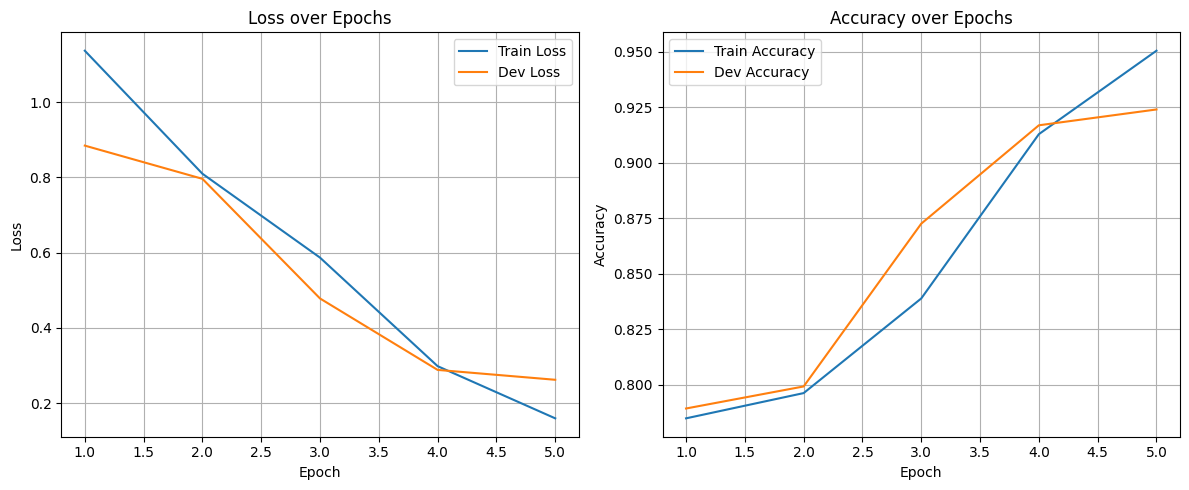

In [35]:
import matplotlib.pyplot as plt

def plot_training_metrics(metrics):
    epochs = range(1, len(metrics['loss']['train']) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics['loss']['train'], label='Train Loss')
    plt.plot(epochs, metrics['loss']['dev'], label='Dev Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss over Epochs")
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics['accuracy']['train'], label='Train Accuracy')
    plt.plot(epochs, metrics['accuracy']['dev'], label='Dev Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over Epochs")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
# metrics = train_loop(model, n_epochs, dataloader_train, dataloader_dev)
plot_training_metrics(metrics)

<br><br><br><br><br><br>

# Part 3 - Evaluation


## Step 1: Evaluation Function

Write an evaluation loop for a trained model using the dev and test datasets. This function will print the `Recall`, `Precision`, and `F1` scores and plot a `Confusion Matrix`.

Perform this evaluation twice:
1. For all labels (7 labels in total).
2. For all labels except "O" (6 labels in total).

## Metrics and Display

### Metrics
- **Recall**: True Positive Rate (TPR), also known as Recall.
- **Precision**: The opposite of False Positive Rate (FPR), also known as Precision.
- **F1 Score**: The harmonic mean of Precision and Recall.

*Note*: For all these metrics, use **weighted** averaging:
Calculate metrics for each label, and find their average weighted by support. Refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) for more details.

### Display
1. Print the `Recall`, `Precision`, and `F1` scores in a tabulated format.
2. Display a `Confusion Matrix` plot:
   - Rows represent the predicted labels.
   - Columns represent the true labels.
   - Include a title for the plot, axis names, and the names of the tags on the X-axis.

In [30]:
def evaluate(model: NERNet, title: str, dataloader: DataLoader, vocab: Vocab):
  """
  Evaluate a trained model on the given dataset.
  :param model: model instance
  :param title: title for the plot
  :param dataloader: dataloader
  :param vocab: Vocab instance
  :return: Dictionary of evaluation results
  """
  results = {}
  # TO DO ----------------------------------------------------------------------

  # TO DO ----------------------------------------------------------------------
  return results

## Step 2: Train & Evaluate on Dev Set

Train and evaluate (on the dev set) a few models, all with `embedding_size=300` and `N_EPOCHS=5` (for fairness and computational reasons), and with the following hyper parameters (you may use that as captions for the models as well):

- Model 1: (hidden_size: 500, n_layers: 1, directions: 1)
- Model 2: (hidden_size: 500, n_layers: 2, directions: 1)
- Model 3: (hidden_size: 500, n_layers: 3, directions: 1)
- Model 4: (hidden_size: 500, n_layers: 1, directions: 2)
- Model 5: (hidden_size: 500, n_layers: 2, directions: 2)
- Model 6: (hidden_size: 500, n_layers: 3, directions: 2)
- Model 7: (hidden_size: 800, n_layers: 1, directions: 2)
- Model 8: (hidden_size: 800, n_layers: 2, directions: 2)
- Model 9: (hidden_size: 800, n_layers: 3, directions: 2)




In [31]:
N_EPOCHS = 5
EMB_DIM = 300

Here is an example (random numbers) of the display of the results):

In [32]:
# Example:
results_acc = np.random.rand(9, 10)
columns = ['N_MODEL','HIDDEN_SIZE','N_LAYERS','DIRECTIONS','RECALL','PERCISION','F1','RECALL_WO_O','PERCISION_WO_O','F1_WO_O']
df = pd.DataFrame(results_acc, columns=columns)
df.N_MODEL = [f'model_{n}' for n in range(1,10)]
print(tabulate(df, headers='keys', tablefmt='psql',floatfmt=".4f"))

+----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------+
|    | N_MODEL   |   HIDDEN_SIZE |   N_LAYERS |   DIRECTIONS |   RECALL |   PERCISION |     F1 |   RECALL_WO_O |   PERCISION_WO_O |   F1_WO_O |
|----+-----------+---------------+------------+--------------+----------+-------------+--------+---------------+------------------+-----------|
|  0 | model_1   |        0.9507 |     0.7320 |       0.5987 |   0.1560 |      0.1560 | 0.0581 |        0.8662 |           0.6011 |    0.7081 |
|  1 | model_2   |        0.9699 |     0.8324 |       0.2123 |   0.1818 |      0.1834 | 0.3042 |        0.5248 |           0.4319 |    0.2912 |
|  2 | model_3   |        0.1395 |     0.2921 |       0.3664 |   0.4561 |      0.7852 | 0.1997 |        0.5142 |           0.5924 |    0.0465 |
|  3 | model_4   |        0.1705 |     0.0651 |       0.9489 |   0.9656 |      0.8084 | 0.3046 |        0.0977 |           0.6842 |    0

In [33]:
# Define models with their hyperparameters
models = {
  'Model1': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 1, 'directions': 1},
  'Model2': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 2, 'directions': 1},
  'Model3': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 3, 'directions': 1},
  'Model4': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 1, 'directions': 2},
  'Model5': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 2, 'directions': 2},
  'Model6': {'embedding_size': EMB_DIM, 'hidden_size': 500, 'n_layers': 3, 'directions': 2},
  'Model7': {'embedding_size': EMB_DIM, 'hidden_size': 800, 'n_layers': 1, 'directions': 2},
  'Model8': {'embedding_size': EMB_DIM, 'hidden_size': 800, 'n_layers': 2, 'directions': 2},
  'Model9': {'embedding_size': EMB_DIM, 'hidden_size': 800, 'n_layers': 3, 'directions': 2},
}

In [34]:
# TO DO ----------------------------------------------------------------------

# TO DO ----------------------------------------------------------------------

# Print results in tabulated format
print(tabulate(results_dev, headers='keys', tablefmt='psql', floatfmt=".4f"))

NameError: name 'results_dev' is not defined

## Step 3: Evaluate on Test Set
Evaluate your models on the test set and save the results as a CSV. Add this file to your repo for submission.

In [ ]:
results = pd.DataFrame(columns=columns)
file_name = "NER_results.csv"
# TO DO ----------------------------------------------------------------------

# TO DO ----------------------------------------------------------------------
print(tabulate(results, headers='keys', tablefmt='psql',floatfmt=".4f"))


## Step 4 - Best Model
Decide which model performs the best, write its configuration, train it for 5 more epochs and evaluate it on the test set.

In [ ]:
best_model_cfg = {'embedding_size':EMB_DIM, 'hidden_size': -1, 'n_layers': -1, 'directions': -1}
# TO DO ----------------------------------------------------------------------

# TO DO ----------------------------------------------------------------------

<br><br><br><br><br>

# Part 4 - Pretrained Embeddings



To prepare for this task, please read [this discussion](https://discuss.pytorch.org/t/can-we-use-pre-trained-word-embeddings-for-weight-initialization-in-nn-embedding/1222).

**TIP**: Ensure that the vectors are aligned with the IDs in your vocabulary. In other words, make sure that the word with ID 0 corresponds to the first vector in the GloVe matrix used to initialize `nn.Embedding`.



## Step 1: Get Data



Download the GloVe embeddings from [this link](https://nlp.stanford.edu/projects/glove/). Use the 300-dimensional vectors from `glove.6B.zip`.



In [ ]:
# TO DO ----------------------------------------------------------------------

# TO DO ----------------------------------------------------------------------

## Step 2: Inject Embeddings

Then intialize the `nn.Embedding` module in your `NERNet` with these embeddings, so that you can start your training with pre-trained vectors.

In [ ]:
def get_emb_matrix(filepath: str, vocab: Vocab) -> np.ndarray:
  emb_matrix = np.zeros((len(vocab.word2id), 300))
  # TO DO ----------------------------------------------------------------------

  # TO DO ----------------------------------------------------------------------
  return emb_matrix

In [ ]:
def initialize_from_pretrained_emb(model: NERNet, emb_matrix: np.ndarray):
  """
  Inject the pretrained embeddings into the model.
  :param model: model instance
  :param emb_matrix: pretrained embeddings
  """
  # TO DO ----------------------------------------------------------------------

  # TO DO ----------------------------------------------------------------------

In [ ]:
# Read embeddings and inject them to a model
emb_file = 'glove.6B.300d.txt'
emb_matrix = get_emb_matrix(emb_file, vocab)
ner_glove = NERNet(input_size=VOCAB_SIZE, embedding_size=EMB_DIM, hidden_size=500, output_size=NUM_TAGS, n_layers=1, directions=1)
initialize_from_pretrained_emb(ner_glove, emb_matrix)

## Step 3: Evaluate on Test Set

Same as the evaluation process before, please display:

1. Print a `RECALL-PERCISION-F1` scores in a tabulate format.
2. Display a `confusion matrix` plot: where the predicted labels are the rows, and the true labels are the columns.

Make sure to use the title for the plot, axis names, and the names of the tags on the X-axis.

Make sure to download and upload this CSV as well.

In [ ]:
results = pd.DataFrame(columns=columns)
file_name = "NER_results_glove.csv"
# TO DO ----------------------------------------------------------------------

# TO DO ----------------------------------------------------------------------
print(tabulate(results, headers='keys', tablefmt='psql',floatfmt=".4f"))

## Step 4 - Best Model
Decide which model performs the best, write its configuration, train it for 5 more epochs and evaluate it on the test set.

In [ ]:
best_model_glove_cfg = {'embedding_size':EMB_DIM, 'hidden_size': -1, 'n_layers': -1, 'directions': -1}
# TO DO ----------------------------------------------------------------------

# TO DO ----------------------------------------------------------------------

# Part 5 - Error Analysis

In this part, you'll analyze the errors made by your best model to understand its strengths and weaknesses.

## Step 1: Extract Predictions

First, let's extract predictions from your best model on the test set:

In [ ]:
def get_predictions(model, dataloader, vocab, PAD_TOKEN, DEVICE):
    """
    Get predictions from the model on a dataloader.

    Returns:
        - true_tags_list: List of lists of true tag strings
        - pred_tags_list: List of lists of predicted tag strings
        - words_list: List of lists of words
    """
    import torch

    model.eval()
    true_tags_list = []
    pred_tags_list = []
    words_list = []

    with torch.no_grad():
        # Handle different dataloader output formats
        for batch in dataloader:
            # Unpack based on actual dataloader output
            if len(batch) == 3:  # (input_ids, casing_features, labels)
                input_ids, casing_features, labels = batch
                # Move tensors to device
                input_ids = input_ids.to(DEVICE)
                casing_features = casing_features.to(DEVICE)
                labels = labels.to(DEVICE)

                # Get model predictions
                outputs = model(input_ids, casing_features)
            else:  # (input_ids, labels)
                input_ids, labels = batch
                # Move tensors to device
                input_ids = input_ids.to(DEVICE)
                labels = labels.to(DEVICE)

                # Get model predictions
                outputs = model(input_ids)

            _, predicted = torch.max(outputs, 2)

            # Process each sequence in the batch
            for i in range(input_ids.size(0)):
                # Get sequence length (ignoring padding)
                seq_len = (input_ids[i] != PAD_TOKEN).sum().item()

                # Convert ids to tag strings and words
                true_tags = [vocab.id2tag[tag.item()] for tag in labels[i][:seq_len]]
                pred_tags = [vocab.id2tag[tag.item()] for tag in predicted[i][:seq_len]]
                words = [vocab.id2word[word.item()] for word in input_ids[i][:seq_len]]

                true_tags_list.append(true_tags)
                pred_tags_list.append(pred_tags)
                words_list.append(words)

    return true_tags_list, pred_tags_list, words_list

## Step 2: Implement Simple Error Analysis

Now, implement a function to analyze the errors in predictions:

In [ ]:
def simple_analyze_errors(true_tags, pred_tags, words):
    """
    Analyze errors in NER predictions.

    Args:
        true_tags: List of true tag sequences
        pred_tags: List of predicted tag sequences
        words: List of word sequences

    Returns:
        dict: Error statistics and examples
    """
    # TODO: Implement error analysis
    # 1. Initialize error categories
    # 2. Process each sequence to identify errors
    # 3. Categorize errors and collect examples
    # 4. Return statistics and examples

    # Placeholder
    return {
        'total_entities': 0,
        'correct_entities': 0,
        'accuracy': 0.0,
        'error_counts': {},
        'error_examples': {}
    }

## Step 3: Helper Functions

Implement these helper functions to extract entities and check for overlapping spans:

In [ ]:
def get_entities_simple(tags):
    """
    Extract entities from a sequence of tags.
    Returns list of (start_idx, end_idx, entity_type) tuples.
    """
    # TODO: Implement entity extraction
    return []

def has_overlap(start1, end1, start2, end2):
    """Check if two spans overlap"""
    # TODO: Implement overlap checking
    return False

## Step 4: Visualization and Analysis

Create a function to display the error analysis results:

In [ ]:
def print_error_analysis(analysis):
    """Print a summary of the error analysis results"""
    # TODO: Implement printing function to show:
    # 1. Basic statistics (total entities, correct entities, accuracy)
    # 2. Error counts by category
    # 3. Examples of each error type
    # 4. Suggestions for improvement based on findings
    pass

## Step 5: Improvement Suggestions

Based on your error analysis, suggest at least three specific improvements to your model. Consider:

1. What types of errors are most common?
2. Are there patterns in the errors (e.g., specific entity types, contexts)?
3. What techniques might address these specific error types?

Write your suggestions in 3-5 sentences for each improvement.

In [ ]:
# Example usage
if __name__ == "__main__":
    # Sample data for testing
    true_tags = [
        ['O', 'B-PER', 'I-PER', 'O', 'B-LOC', 'I-LOC', 'O'],
        ['B-ORG', 'I-ORG', 'O', 'B-PER', 'O']
    ]

    pred_tags = [
        ['O', 'B-PER', 'O', 'O', 'B-ORG', 'I-ORG', 'O'],
        ['B-ORG', 'I-ORG', 'I-ORG', 'B-PER', 'O']
    ]

    words = [
        ['The', 'John', 'Smith', 'visited', 'New', 'York', 'yesterday'],
        ['Google', 'Inc', 'hired', 'Alice', 'recently']
    ]

    # Run the error analysis
    analysis = simple_analyze_errors(true_tags_list, pred_tags_list, words_list)
    print_error_analysis(analysis)

    # TODO: Write your improvement suggestions here

Remember to focus on substantive analysis rather than code complexity. Your goal is to identify meaningful patterns and provide practical suggestions for improvement.

# Testing
Copy the content of the **tests.py** file from the repo and paste below. This will create the results.json file and download it to your machine.

In [ ]:
####################
# PLACE TESTS HERE #
train_ds = read_data("data/train.txt")
dev_ds = read_data("data/dev.txt")
test_ds = read_data("data/test.txt")
def test_read_data():
    result = {
        'lengths': (len(train_ds), len(dev_ds), len(test_ds)),
    }
    return result

vocab = Vocab(train_ds)
def test_vocab():
    sent = vocab.index_words(["I", "am", "Spongebob"])
    return {
        'length': vocab.n_words,
        'tag2id_length': len(vocab.tag2id),
        "Spongebob": sent[2]
    }

train_sequences = prepare_data(train_ds, vocab)
dev_sequences = prepare_data(dev_ds, vocab)
test_sequences = prepare_data(test_ds, vocab)

def test_count_oov():
    return {
        'dev_oov': count_oov(dev_sequences),
        'test_oov': count_oov(test_sequences)
    }

BATCH_SIZE = 16
dl_train = prepare_data_loader(train_sequences, batch_size=BATCH_SIZE)
dl_dev = prepare_data_loader(dev_sequences, batch_size=BATCH_SIZE, train=False)
dl_test = prepare_data_loader(test_sequences, batch_size=BATCH_SIZE, train=False)

def test_prepare_data_loader():
    return {
        'lengths': (len(dl_train), len(dl_dev), len(dl_test))
    }


def test_NERNet():
    # Extract best model configuration
    hidden_size = best_model_cfg['hidden_size']
    n_layers = best_model_cfg['n_layers']
    directions = best_model_cfg['directions']


    # Create model
    best_model = NERNet(vocab.n_words, embedding_size=300, hidden_size=hidden_size, output_size=vocab.n_tags, n_layers=n_layers, directions=directions)
    best_model.to(DEVICE)

    # Train model and evaluate
    _ = train_loop(best_model, n_epochs=10, dataloader_train=dl_train, dataloader_dev=dl_dev)
    results = evaluate(best_model, title="", dataloader=dl_test, vocab=vocab)

    return {
        'f1': results['F1'],
        'f1_wo_o': results['F1_WO_O'],
    }

def test_glove():
    # Get embeddings
    emb_file = 'glove.6B.300d.txt'
    emb_matrix = get_emb_matrix(emb_file, vocab)

    # Extract best model configuration
    hidden_size = best_model_glove_cfg['hidden_size']
    n_layers = best_model_glove_cfg['n_layers']
    directions = best_model_glove_cfg['directions']

    # Create model
    best_model = NERNet(vocab.n_words, embedding_size=300, hidden_size=hidden_size, output_size=vocab.n_tags, n_layers=n_layers, directions=directions)
    best_model.to(DEVICE)
    initialize_from_pretrained_emb(ner_glove, emb_matrix)

    # Train model and evaluate
    _ = train_loop(best_model, n_epochs=10, dataloader_train=dl_train, dataloader_dev=dl_dev)
    results = evaluate(best_model, title="", dataloader=dl_test, vocab=vocab)

    return {
        'f1': results['F1'],
        'f1_wo_o': results['F1_WO_O'],
    }

TESTS = [
    test_read_data,
    test_vocab,
    test_count_oov,
    test_prepare_data_loader,
    test_NERNet,
    test_glove
]

# Run tests and save results
res = {}
for test in TESTS:
    try:
        cur_res = test()
        res.update({test.__name__: cur_res})
    except Exception as e:
        res.update({test.__name__: repr(e)})

with open('results.json', 'w') as f:
    json.dump(res, f, indent=2)

# Download the results.json file
files.download('results.json')

####################
